# Importing libraries 

In [1]:
import cv2
import imageio
from scipy import ndimage, misc
import numpy as np 
import matplotlib.pyplot as plt
from skimage import filters, morphology
from skimage.color import rgb2gray
from tqdm import tqdm

# Extract all the frames 

In [2]:
def extract_frames(path):
    
    '''
    This function extract the frames of a video and saved them.
    this code is copied from the following website:  https://theailearner.com/2018/10/15/extracting-and-saving-video-frames-using-opencv-python/ 
    '''
    
    # path : the path of the video to be analyzed 
    
    cap = cv2.VideoCapture(path)
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite('frame'+str(i)+'.jpg',frame)
        i+=1
 
    cap.release()
    cv2.destroyAllWindows()
    return i 

# Working on one frame

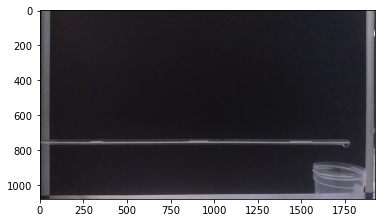

In [44]:
path = 'frame763.jpg'
I = imageio.imread(path)
plt.imshow(I)
plt.show()

In [45]:
B = I[700:800,70:1730,:]

In [46]:
B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
cv2.imwrite('cropped.jpg',B)                            


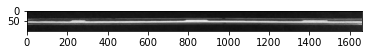

In [47]:
plt.imshow(B,plt.cm.gray)
plt.show()

Get the histogram of the frame 763

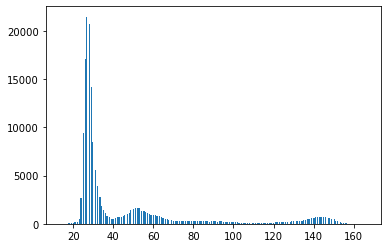

In [48]:
h, e = np.histogram(B,bins = 256)

plt.hist(B.flatten(),256)
plt.show()

Otsu thresholding method

In [49]:
T_otsu = filters.threshold_otsu(B)
B = B>=T_otsu

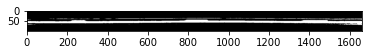

In [50]:
plt.imshow(B,plt.cm.gray)
plt.show()

In [51]:
plt.imsave('treshholded2.bmp',B, cmap=plt.cm.gray)                            

Applying opening to remove the tube's line and the water droplet

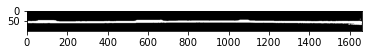

In [25]:
struct = morphology.ball(2)[2] 
img_opening = ndimage.binary_opening(B,struct)

plt.imshow(img_opening,plt.cm.gray)
plt.show()
plt.imsave('opentreshholded.bmp',img_opening, cmap=plt.cm.gray)                            

In [26]:
plt.imsave('opentreshholded.bmp',B_opening, cmap=plt.cm.gray)                            

Superposing the binary image and the original one

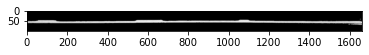

In [28]:
img = I[700:800,70:1730,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
superposed_img = np.multiply(img,np.uint(img_opening))
plt.imshow(superposed_img,plt.cm.gray)
plt.show()

In [31]:
plt.imsave('superpose.jpg',superposed_img,cmap = plt.cm.gray)

Computing the sum of the pixels of each column in the superposed image and scale it

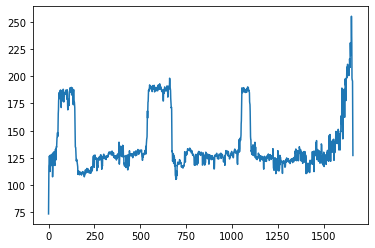

In [33]:
compute = np.sum(superposed_img,axis = 0)
plt.plot(255*compute/np.amax(compute))

# Generalizing the method for any video 

In [3]:
def get_spatiotemporal(I):
    
    # I: image 
    
    #croping the image and convert it to grayscale 
    
    B = I[700:800,70:1660,:]
    B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
    T_otsu = filters.threshold_otsu(B)
    B = B>=T_otsu
    
    # applying opening in the cropped image to remove the traces of the tube 
        
    struct = morphology.ball(2)[2] #
    B_opening = ndimage.binary_opening(B,struct)
    
    # superpose the resulting image of the opening operation and the original cropped image
    
    X = I[700:800,70:1660,:]
    X = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
    A = np.multiply(X,B_opening)
    
   
    # Compute the sum of each column of the image A 
    
    compute = np.sum(A, axis = 0)
    compute = 255*compute/np.amax(compute)
    compute = np.reshape(compute,(1590,1))
    
    return compute

In [4]:
def main(path,name = 'result'):
    
    # path : is the path of the video
    
    # extracting all the frames
    
    n = extract_frames(path)
    
    # computing the result
    
    compute = np.zeros((1590,1))
    
    for i in tqdm(range(1,n)):
        path = 'frame'+str(i)+'.jpg'  #le chemin de chaque frame 
        I = imageio.imread(path)
        ci = get_spatiotemporal(I)
        compute = np.concatenate((compute,ci), axis = 1)
    
    
    #Saving and plotting the result 

    
    
    cv2.imwrite(name+'.jpg',np.transpose(compute))                            
    plt.imshow(np.transpose(compute),plt.cm.gray)
    plt.show()
                                 

# Testing on the two videos 

100%|██████████| 5593/5593 [05:05<00:00, 18.32it/s]


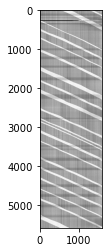

In [5]:
# Please give this function the path of the video or just its name if you have saved this notebook in the same folder as the video
# also give a name for the result without the exetension: example: for the first video the argument name = 'resultvid1'

main('slug_vid1.mp4',name = 'resultvid1') # test for the first video 

In [ ]:
# Please give this function the path of the video or just its name if you have saved this notebook in the same folder as the video

main('slug_vid2.mp4',name = 'resultvid2') # test for the second video 